# Remote Job Market Intelligence using Ethical Web Scraping
**Project Type**: Data Science Internship Project

**Organization**: Evoastra Ventures (OPC) Pvt Ltd

**Difficulty Level**: Beginner-Friendly

**Duration**: 7 Days (Full-Time)

**Target Website**: https://remoteok.com

## Libraries we need

In [1]:
import requests
import time
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from collections import Counter
import re

## Extracting All Data Fields 
- To extract data we use tags to search in website and get it in JSON format
- Then we take the JSON format file of extraction
- First we collect data
- Second we check if it is already in the list if not add it
- Third we make a dataframe

In [2]:
# 1. Expanded search tags to cover the whole market
categories = [
    '3d', 'cybersecurity', 'data entry', 'testing', 'accountant', 'accounting', 'admin', 'ads', 'adult', 'ai', 'amazon', 'analyst', 'analytics', 
    'android', 'angular', 'api', 'app', 'architect', 'art', 'assistant', 'aws', 'backend', 'banking', 'blockchain', 'branding', 'cloud', 'code', 
    'consultant', 'content', 'copywriter', 'cro', 'crypto', 'css', 'cto', 'design', 'designer', 'dev', 'developer', 'docker', 'education', 'embedded', 
    'engineer', 'engineering', 'ethereum', 'excel', 'executive', 'finance', 'financial', 'frontend', 'full-time', 'game', 'golang', 'growth', 'health', 
    'healthcare', 'hr', 'internship', 'it', 'java', 'junior', 'lead', 'leader', 'legal', 'management', 'manager', 'marketing', 'medical', 'mobile', 
    'music', 'non tech', 'operational', 'python', 'react', 'recruiter', 'sales', 'software', 'solidity', 'stack', 'strategy', 'support', 'technical', 
    'travel', 'ui', 'ux', 'video', 'voice', 'web', 'web3'
   ]
# Dictionary to store unique jobs by URL
all_jobs = {}
# Using heasders to look like human
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/120.0.0.0'}
# 2. EXECUTION: The Scraping Loop
print("Starting 'Unlimited' API Extraction...")
# Running loop for all categories
for tag in categories:
# Using tag name to Search in website 
    url = f"https://remoteok.com/api?tag={tag}"
    try:
        # Getting URL data 
        response = requests.get(url, headers=headers)
        # Checking website status 200 means good
        if response.status_code == 200:
            # Converting URL data in json format 
            data = response.json()
            # Skip the first item (it's always the legal/meta notice)
            for job in data[1:]:
                # Finding URL data in json format
                job_url = job.get('url')
                # Check if we already have this job
                if job_url not in all_jobs:
                    # Adding all data in one Dictionary
                    all_jobs[job_url] = {
                        'Company': job.get('company'),
                        'Title': job.get('position'),
                        'Tags': ", ".join(job.get('tags', [])),
                        'Location': job.get('location'),
                        'Date': (job.get('date', ''))[:10],
                        'URL': job_url
                    }
            
            print(f"Collected {len(all_jobs)} unique jobs... (just added {tag})")
        
        elif response.status_code == 429:
            print("Being throttled. Waiting 10 seconds...")
            time.sleep(10)
            
    except Exception as e:
        print(f"Error fetching {tag}: {e}")

    # Safety delay to stay under the radar
    time.sleep(1.5)

# 3. Save the results
df = pd.DataFrame(all_jobs.values())

print("-" * 30)
print(f"FINAL TOTAL: {len(df)} unique jobs saved.")

Starting 'Unlimited' API Extraction...
Collected 15 unique jobs... (just added 3d)
Collected 16 unique jobs... (just added cybersecurity)
Collected 16 unique jobs... (just added data entry)
Collected 114 unique jobs... (just added testing)
Collected 119 unique jobs... (just added accountant)
Collected 138 unique jobs... (just added accounting)
Collected 146 unique jobs... (just added admin)
Collected 151 unique jobs... (just added ads)
Collected 157 unique jobs... (just added adult)
Collected 242 unique jobs... (just added ai)
Collected 249 unique jobs... (just added amazon)
Collected 287 unique jobs... (just added analyst)
Collected 339 unique jobs... (just added analytics)
Collected 340 unique jobs... (just added android)
Collected 344 unique jobs... (just added angular)
Collected 379 unique jobs... (just added api)
Collected 382 unique jobs... (just added app)
Collected 406 unique jobs... (just added architect)
Collected 415 unique jobs... (just added art)
Collected 422 unique jobs.

In [3]:
df = pd.DataFrame(all_jobs.values())

## Data Cleaning and Storage
So we have the data but it have many missing values,duplicate entries and the data is not in Standardize text("Python Developer" and "python developer" are not same in data frame)

### First Standardize text
#### 1. Location column
- We have Location but it have city name, country name, continent name, and have remote(work form home)
- We make 3 column for each country column, continent column, remote column
- Converting every city,country name in stand Country name and add to country column
- Converting every country name in stand continent name and add to continent column
- Checking every country name than add its continent namein continent column
- Checking if there is any name in Location for remote if yes then add Contract to remote column if no add Full-Time

In [4]:
# 1. Continent Mapping
country_to_continent = {
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'United Kingdom': 'Europe', 'Germany': 'Europe', 'France': 'Europe', 'Spain': 'Europe',
    'Italy': 'Europe', 'Poland': 'Europe', 'Netherlands': 'Europe', 'Romania': 'Europe',
    'Bulgaria': 'Europe', 'Greece': 'Europe', 'Portugal': 'Europe', 'Ukraine': 'Europe',
    'Serbia': 'Europe', 'Bosnia': 'Europe', 'Turkey': 'Europe', 'Armenia': 'Asia',
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Singapore': 'Asia',
    'Philippines': 'Asia', 'Thailand': 'Asia', 'Malaysia': 'Asia', 'Vietnam': 'Asia',
    'South Korea': 'Asia', 'Taiwan': 'Asia', 'Hong Kong': 'Asia', 'Jordan': 'Asia',
    'Bangladesh': 'Asia', 'UAE': 'Asia', 'Israel': 'Asia', 'Australia': 'Oceania',
    'Brazil': 'South America', 'Argentina': 'South America', 'Colombia': 'South America',
    'Chile': 'South America', 'Peru': 'South America', 'Kenya': 'Africa',
    'Egypt': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Tanzania': 'Africa'
}

# 2. Key-Value mapping for standardizing
keyword_to_country = {
    'united states': 'United States', 'usa': 'United States', 'u s': 'United States', 'u.s.': 'United States', 
    'u.s': 'United States', 'us': 'United States', 'america': 'United States', 'washington': 'United States', 
    'texas': 'United States', 'california': 'United States', 'florida': 'United States', 'austin': 'United States', 
    'new york': 'United States', 'ny': 'United States', 'sf': 'United States', 'san francisco': 'United States', 
    'chicago': 'United States', 'boston': 'United States', 'seattle': 'United States', 'denver': 'United States', 
    'atlanta': 'United States', 'miami': 'United States', 'dallas': 'United States', 'united kingdom': 'United Kingdom', 
    'uk': 'United Kingdom', 'london': 'United Kingdom', 'manchester': 'United Kingdom', 'cardiff': 'United Kingdom', 
    'canada': 'Canada', 'toronto': 'Canada', 'vancouver': 'Canada', 'ontario': 'Canada', 'india': 'India', 
    'bangalore': 'India', 'bengaluru': 'India', 'delhi': 'India', 'hyderabad': 'India', 'mumbai': 'India', 
    'germany': 'Germany', 'berlin': 'Germany', 'france': 'France', 'paris': 'France', 'spain': 'Spain', 
    'madrid': 'Spain', 'barcelona': 'Spain', 'brazil': 'Brazil', 'mexico': 'Mexico', 'philippines': 'Philippines', 
    'argentina': 'Argentina', 'colombia': 'Colombia', 'columbia': 'Colombia', 'romania': 'Romania', 
    'netherlands': 'Netherlands', 'amsterdam': 'Netherlands', 'egypt': 'Egypt', 'cairo': 'Egypt', 
    'jordan': 'Jordan', 'amman': 'Jordan', 'kenya': 'Kenya', 'nairobi': 'Kenya', 'tanzania': 'Tanzania', 
    'ukraine': 'Ukraine', 'kyiv': 'Ukraine', 'poland': 'Poland', 'bulgaria': 'Bulgaria', 'sofia': 'Bulgaria', 
    'portugal': 'Portugal', 'lisbon': 'Portugal', 'serbia': 'Serbia', 'belgrade': 'Serbia', 'bosnia': 'Bosnia', 
    'greece': 'Greece'
}
# Key-Value mapping for standardizing
continent_keywords = {
    'europe': 'Europe', 'asia': 'Asia', 'africa': 'Africa', 'north america': 'North America',
    'south america': 'South America', 'oceania': 'Oceania', 'australia': 'Oceania', 'latam': 'South America',
    'emea': 'Europe', 'eu': 'Europe', 'apac': 'Asia'
}
# To check and remove remote form location column
def master_processor(location):
    if pd.isna(location):
        return pd.Series([np.nan, np.nan, "No"])
    
    loc_str = str(location).strip()
    
    # Checking remote and add to Remote Column 
    is_remote = "Contract" if re.search(r'remote', loc_str, re.IGNORECASE) else "Full-Time"
    
    # Remove 'remote' and clean up
    clean = re.sub(r'remote', '', loc_str, flags=re.IGNORECASE).lower().strip()
    
    # Important: Do not remove dots yet to distinguish U.S. from other things
    # But remove other messy punctuation
    clean = re.sub(r'[^a-z\s.]', ' ', clean).strip()
    clean = re.sub(r'\s+', ' ', clean)

    target_country = None
    target_continent = None

    # Matching logic
    # Try longest keys first
    sorted_country_keys = sorted(keyword_to_country.keys(), key=len, reverse=True)
    
    for key in sorted_country_keys:
        # Check for match with word boundaries or exact string for things like 'u.s.'
        if re.search(rf'\b{re.escape(key)}\b', clean) or key == clean:
            target_country = keyword_to_country[key]
            target_continent = country_to_continent.get(target_country)
            break
            
    # Try continent if no country
    if not target_country:
        for key in sorted(continent_keywords.keys(), key=len, reverse=True):
            if re.search(rf'\b{re.escape(key)}\b', clean) or key == clean:
                target_country = ''
                target_continent = continent_keywords[key]
                break

    # If both remain None, return NaN
    if target_country is None and target_continent is None:
        return pd.Series([np.nan, np.nan, is_remote])
    
    return pd.Series([target_country, target_continent, is_remote])

# Apply processing
df[['Country', 'Continents', 'Job Type']] = df['Location'].apply(master_processor)

# Final Columns order
cols = ['Country', 'Continents', 'Job Type'] + [c for c in df.columns if c not in ['Country', 'Continents', 'Job Type', 'Location']]
df = df[cols]

#### 2. Tags column
- So we have tags but tags should also be in list form
- We clean all the tags than convert them in lower case.
- Remove duplicates if any rows have two tags of same name
- Now to have to count haw many times the tags name appear in our data set

In [5]:
def standardize_tags(tags_str):
    if pd.isna(tags_str) or not str(tags_str).strip():
        return "Not Specified"
    
    # Split by comma
    tags_list = str(tags_str).split(',')
    
    # Clean: Lowercase, strip whitespace
    cleaned_tags = [t.strip().lower() for t in tags_list if t.strip()]
    
    # Remove duplicates while maintaining some order or just sort them
    unique_tags = sorted(list(set(cleaned_tags)))
    
    # Join back with comma and space
    return ", ".join(unique_tags)

# Apply to Tags column
df['Tags'] = df['Tags'].apply(standardize_tags)

# Let's see the most common individual tags
all_tags = []
for t_str in df['Tags']:
    if t_str != "Not Specified":
        all_tags.extend([t.strip() for t in t_str.split(',')])
# The tags_counts have the data         
tag_counts = pd.Series(all_tags).value_counts().head(20)

#### 3. Title column
- We clean The special symbols, white space, any other tags
- Clean specific location tags
- Standardize common abbreviations and levels

In [6]:

def standardize_title(title):
    if pd.isna(title):
        return "Not Specified"
    
    t = str(title)
    
    # 1. Remove specific location tags like (US), (UK), (Remote), [Remote] often found in titles
    t = re.sub(r'\(.*?\)|\[.*?\]', '', t)
    
    # 2. Standardize common abbreviations and levels
    t = re.sub(r'\bSr\b\.?', 'Senior', t, flags=re.IGNORECASE)
    t = re.sub(r'\bJr\b\.?', 'Junior', t, flags=re.IGNORECASE)
    
    # 3. Clean up the word "Remote" if it was left in the title text
    t = re.sub(r'\s*[-\/,]*\s*remote\s*[-\/,]*\s*', ' ', t, flags=re.IGNORECASE).strip()
    
    # 4. Remove extra symbols often used in job board titles
    t = re.sub(r'[|:,\-\/]', ' ', t)
    
    # 5. Normalize whitespace and Title Case
    t = re.sub(r'\s+', ' ', t).strip().title()
    
    return t

# Apply the function to the Title column
df['Title'] = df['Title'].apply(standardize_title)

#### 4. Company column
- Basic Cleaning
- Remove common legal suffixes (Inc, Ltd, LLC, Corp, etc.)
- Clean special symbols, white space, any other tags

In [7]:
def standardize_company(name):
    if pd.isna(name):
        return "Not Specified"
    
    # 1. Basic Cleaning: strip whitespace and standardize case
    c = str(name).strip()
    
    # 2. Remove common legal suffixes (Inc, Ltd, LLC, Corp, etc.) 
    # This helps group "Mainstay Labs Inc." and "Mainstay Labs" as the same company.
    # We use regex with word boundaries
    suffixes = r'\b(Inc|Ltd|LLC|Corp|Corporation|Limited|Group|Co|S\.A|L\.P|Holdings|Labs)\b\.?'
    c = re.sub(suffixes, '', c, flags=re.IGNORECASE).strip()
    
    # 3. Clean up trailing punctuation left over after suffix removal
    c = re.sub(r'[,.\-\/]+$', '', c).strip()
    
    # 4. Normalize spacing
    c = re.sub(r'\s+', ' ', c)
    
    return c

# Apply to Company column
df['Company'] = df['Company'].apply(standardize_company)

# Preview results
print("Preview of Standardized Company Names:")
print(df['Company'].head(5))

Preview of Standardized Company Names:
0             Sanctuary
1             Heartflow
2    Anduril Industries
3                  Hook
4    PlayStation Global
Name: Company, dtype: object


## Second Identify and handle missing values (rows with 'NaN')
- Converting white space into NaN
- Then remove them form the dataset
- Also remove unnecessary columns
- Remove duplicate entries

In [8]:
# Replace White space in NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
# Removing NaN Carrying rows.If country and Continent both have no value drop it
df.dropna(subset=['Country', 'Continents'], how='all', inplace=True)
# No need of Location column so drop it
df.drop(columns=['Location'], errors='ignore', inplace=True)

In [9]:
# Remove duplicate entries
df = df.drop_duplicates(subset=['Title', 'Company', 'URL'])

In [10]:
# Display basic info
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")

Total rows: 463
Columns: ['Country', 'Continents', 'Job Type', 'Company', 'Title', 'Tags', 'Date', 'URL']

Missing values:
Country       26
Continents     0
Job Type       0
Company        0
Title          0
Tags           0
Date           0
URL            0
dtype: int64


**So some country have no value That means the are completely remote(work from home)**

## Data Analysis and Insights
- Analyze scraped job data to identify trends
- Answer real business questions using the data
- Prepare visualizations

**Count the frequency of each job title (which roles appear most often?)**

In [11]:
print("\nTop 10 Most Common Titles:")
print(df['Title'].value_counts().head(10))


Top 10 Most Common Titles:
Title
Software Engineer                   14
Account Executive                    5
Senior Data Engineer                 4
Staff Software Engineer              4
Devops Engineer                      4
Data Engineer                        4
Senior Software Engineer             4
Enterprise Account Executive         3
Sales Development Representative     3
Growth Marketing Manager             3
Name: count, dtype: int64


**Count the frequency of each skill (which skills are most demanded?)**

In [12]:
print("\nTop 20 Most Common Individual Skill:")
print(tag_counts)


Top 20 Most Common Individual Skill:
support          409
engineer         318
software         313
technical        306
senior           298
management       293
digital nomad    293
growth           268
design           245
engineering      243
lead             238
manager          209
health           204
sales            187
financial        187
security         177
marketing        174
cloud            160
operations       156
system           142
Name: count, dtype: int64


**Analyze job type distribution (how many Remote vs In office?)**

In [13]:
print(df['Job Type'].value_counts())

Job Type
Full-Time    316
Contract     147
Name: count, dtype: int64


**Analyze location distribution**

In [14]:
print("\nTop 10 Most Country:")
print(df['Country'].value_counts().head(10))


Top 10 Most Country:
Country
United States     301
India              29
Canada             22
United Kingdom     22
Brazil             10
Philippines         6
Spain               6
Mexico              5
Argentina           4
Colombia            4
Name: count, dtype: int64


In [15]:
print("\nTop Most Continents:")
print(df['Continents'].value_counts())


Top Most Continents:
Continents
North America    328
Europe            65
Asia              42
South America     21
Africa             6
Oceania            1
Name: count, dtype: int64


**Calculate average number of skills per job**

In [16]:
# Count the number of tags in each row
# We split by the comma and get the length of the resulting list
df['Skill_Count'] = df['Tags'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
# Calculate the average
average_skills = df['Skill_Count'].mean()
print(f"The average number of skills required per job is: {average_skills:.2f}")

The average number of skills required per job is: 9.46


**Identify the top companies by number of postings**

In [17]:
# Top companies
print("\nTop 10 Companies:")
print(df['Company'].value_counts().head(10))


Top 10 Companies:
Company
CI&amp;T             9
InfStones            9
Tech Innovations     9
3Pillar              7
BitMEX               6
Anchorage Digital    6
Alpaca               5
Ava                  5
Adyen                5
GiveDirectly         4
Name: count, dtype: int64


## Visualization and Insights
The following visualizations present insights generated from RemoteOK job data, focusing on job demand, hiring activity, skill trends, and regional distribution.

In [18]:
# Using RemoteOK like palette
BLUE   = '#1f6ae1'   # soft blue
GREEN  = '#2db39e'   # teal green
YELLOW = '#f5c84c'   # accent
GRID   = '#eaeaea'

plt.rcParams['axes.edgecolor'] = '#dddddd'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['font.size'] = 10
plt.rcParams['figure.facecolor'] = 'white' 


**1️⃣ Visualization: Top Remote Job Roles by Demand**

Question: Which job roles show the highest demand in the remote job market?

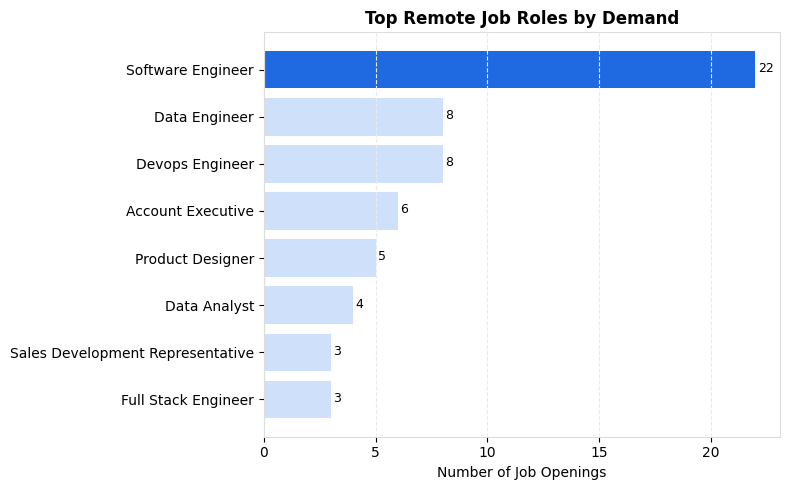

In [19]:
# To get proper job titles 
df['Title_Clean'] = (
    df['Title']
    .str.lower()
    .str.replace('senior ', '', regex=False)
    .str.replace('staff ', '', regex=False)
    .str.replace('jr ', '', regex=False)
    .str.replace('sr ', '', regex=False)
    .str.title()
)

# To get top job roles
top_roles = (
    df['Title_Clean']
    .value_counts()
    .head(8)          
    .sort_values()
)

# Highlighting most demanded job role
colors = [
    BLUE if val == top_roles.max() else '#cfe0fb'
    for val in top_roles.values
]

#plotting horizontal bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(top_roles.index, top_roles.values, color=colors)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + 0.35,
        bar.get_width(),
        fontsize=9
    )

plt.title('Top Remote Job Roles by Demand', weight='bold')
plt.xlabel('Number of Job Openings')
plt.grid(axis='x', linestyle='--', color=GRID)
plt.tight_layout()
plt.show()

Interpretation - Software and engineering-related roles show the highest demand, indicating that remote hiring is heavily driven by technology-centric positions.

**2️⃣ Visualization: Top Companies Actively Hiring for Remote Roles**

Question: Which companies are most active in remote hiring?

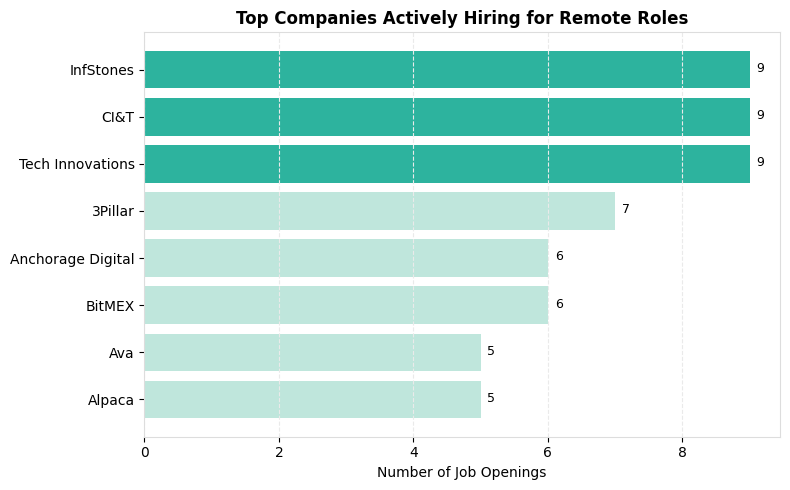

In [20]:
# To get proper company names
df['Company'] = df['Company'].str.replace('&amp;', '&', regex=False)

# To get top hiring company names
top_companies = (
    df['Company']
    .value_counts()
    .head(8)         
    .sort_values()
)

# Highlighting top companies
colors = [
    GREEN if val == top_companies.max() else '#bfe6dc'
    for val in top_companies.values
]

#plotting horizontal bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(top_companies.index, top_companies.values, color=colors)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + 0.35,
        bar.get_width(),
        fontsize=9
    )

plt.title('Top Companies Actively Hiring for Remote Roles', weight='bold')
plt.xlabel('Number of Job Openings')
plt.grid(axis='x', linestyle='--', color=GRID)
plt.tight_layout()
plt.show()

Interpretation - A small group of companies contributes significantly to remote hiring, showing centralized demand among key employers.

**3️⃣ Visualization: Most In-Demand Market Skills in Remote Jobs**

Question: Which technical and professional skills are most frequently required in remote job postings?

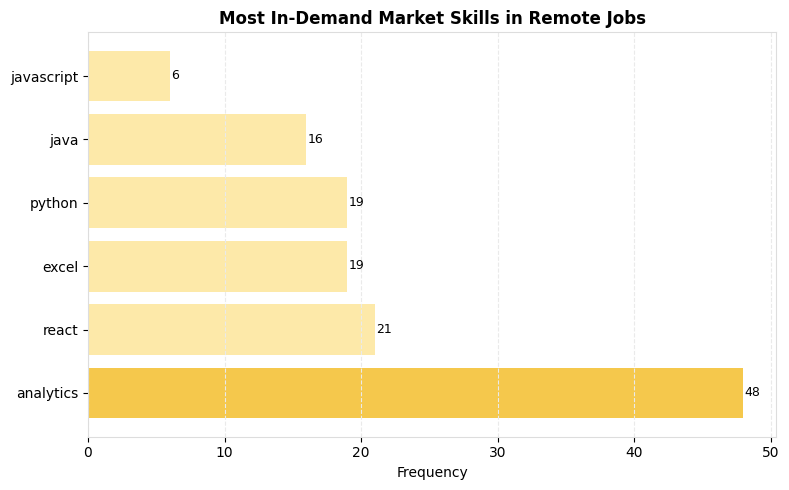

In [21]:
# Including relevant market skills 
MARKET_SKILLS = {
    'python','sql','java','javascript','react','excel',
    'tableau','powerbi','data','analytics',
    'machine','learning',
    'communication','teamwork','problem','analysis'
}

import re
from collections import Counter

# Extract and filter skills from tags 
skills = [
    word
    for text in df['Tags'].dropna()
    for word in re.findall(r'\b[a-zA-Z]+\b', text.lower())
    if word in MARKET_SKILLS
]

top_skills = dict(Counter(skills).most_common(8))

# Highlighting most demanded skill 
colors = [
    YELLOW if v == max(top_skills.values()) else '#fde9a9'
    for v in top_skills.values()
]

#plotting horizontal bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(list(top_skills.keys()), list(top_skills.values()), color=colors)

for bar in bars:
    plt.text(bar.get_width()+0.1, bar.get_y()+0.35,
             bar.get_width(), fontsize=9)

plt.title('Most In-Demand Market Skills in Remote Jobs', weight='bold')
plt.xlabel('Frequency')
plt.grid(axis='x', linestyle='--', color=GRID)
plt.tight_layout()
plt.show()

Interpretation - Technical skills such as analytics and programming languages dominate job requirements, reflecting skill-driven hiring in remote roles.

**4️⃣ Visualization: Remote Job Distribution by Region**

Question: How are remote job opportunities distributed across different regions?

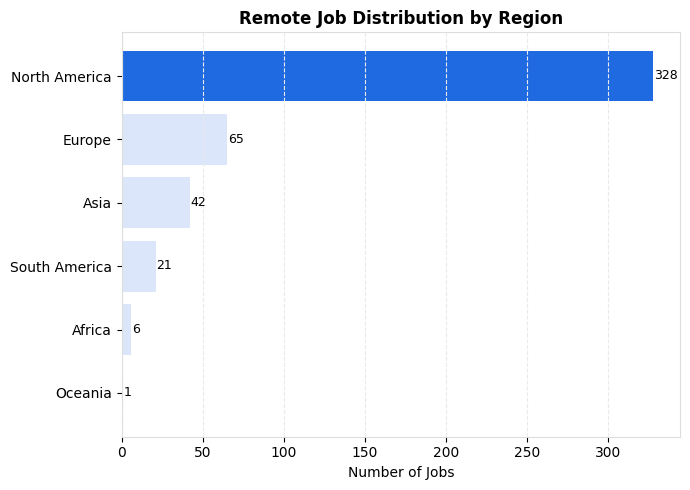

In [22]:
# Count of jobs by region 
region_counts = (
    df['Continents']
    .value_counts()
    .sort_values()
)

# Highlighting top region
colors = [
    BLUE if v == region_counts.max() else '#dbe6fb'
    for v in region_counts.values
]

#plotting horizontal bar chart
plt.figure(figsize=(7,5))
bars = plt.barh(region_counts.index, region_counts.values, color=colors)

for bar in bars:
    plt.text(bar.get_width()+0.5, bar.get_y()+0.35,
             bar.get_width(), fontsize=9)

plt.title('Remote Job Distribution by Region', weight='bold')
plt.xlabel('Number of Jobs')
plt.grid(axis='x', linestyle='--', color=GRID)
plt.tight_layout()
plt.show()

Interpretation - Remote opportunities are concentrated in specific regions, but global distribution confirms growing acceptance of remote work.

**5️⃣ Visualization: Monthly Trend of Remote Job Postings**

Question: How has remote hiring activity changed over time?

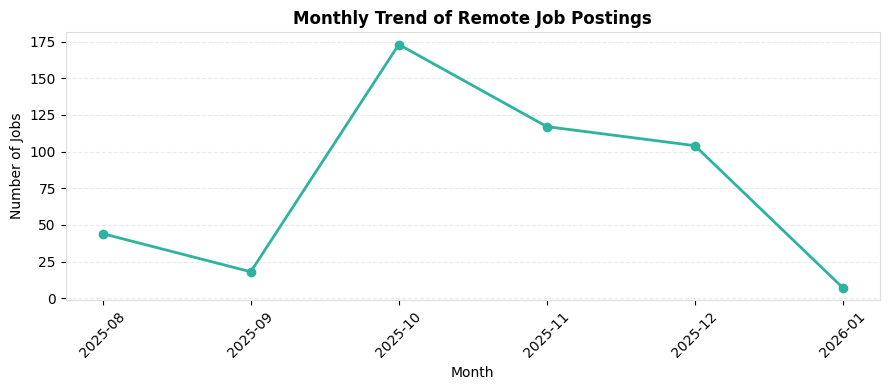

In [23]:
# Convert date to Month-Year format
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.to_period('M')

trend = (
    df['Month']
    .value_counts()
    .sort_index()
)

#plotting line chart
plt.figure(figsize=(9,4))
plt.plot(trend.index.astype(str), trend.values,
         marker='o', linewidth=2, color=GREEN)

plt.title('Monthly Trend of Remote Job Postings', weight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color=GRID)
plt.tight_layout()
plt.show()

Interpretation - Hiring activity shows periodic spikes, suggesting seasonal or campaign-based recruitment patterns in remote hiring.

#### Comparative Analysis 1: Contract vs Full-Time Roles

Question: Do contract roles and full-time roles require different skills?

Methodology: Separate the dataset into two groups based on job type. Extract skills for each group and compare the top skills.

In [24]:
# Separate by job type
full_time = df[df['Job Type'] == 'Full-Time'].copy()
contract = df[df['Job Type'] == 'Contract'].copy()

# Extract skills for full-time
ft_skills = full_time.copy()
ft_skills['Tags'] = ft_skills['Tags'].str.split(', ')
ft_skills = ft_skills.explode('Tags')
top_ft_skills = ft_skills['Tags'].value_counts().head(10)

# Extract skills for contract
c_skills = contract.copy()
c_skills['Tags'] = c_skills['Tags'].str.split(', ')
c_skills = c_skills.explode('Tags')
top_c_skills = c_skills['Tags'].value_counts().head(10)

# Compare
print("Top Skills for Full-Time Jobs:")
print(top_ft_skills)
print("\nTop Skills for Contract Jobs:")
print(top_c_skills)

# Identify differences
full_time_only = set(top_ft_skills.index) - set(top_c_skills.index)
contract_only = set(top_c_skills.index) - set(top_ft_skills.index)

print(f"\nSkills unique to Full-Time roles: {full_time_only}")
print(f"Skills unique to Contract roles: {contract_only}")

Top Skills for Full-Time Jobs:
Tags
support          127
software         120
senior           112
engineer         111
technical         99
management        97
digital nomad     96
growth            93
engineering       90
design            79
Name: count, dtype: int64

Top Skills for Contract Jobs:
Tags
support          57
management       51
technical        47
engineer         46
software         43
sales            42
digital nomad    42
senior           37
financial        36
design           34
Name: count, dtype: int64

Skills unique to Full-Time roles: {'growth', 'engineering'}
Skills unique to Contract roles: {'sales', 'financial'}


### Comparative Analysis 2: Skill Demand Across Job Titles

Question: Which skills are essential for different job titles?

Methodology: For the top 3-5 job titles, identify the most common skills in each.

In [25]:
# Get top 3 job titles
top_3_titles = df['Title'].value_counts().head(3).index.tolist()

for title in top_3_titles:
    title_jobs = df[df['Title'] == title].copy()
    title_skills = title_jobs.copy()
    title_skills['Tags'] = title_skills['Tags'].str.split(', ')
    title_skills = title_skills.explode('Tags')
    
    print(f"\nTop skills for '{title}':")
    print(title_skills['Tags'].value_counts().head(5))


Top skills for 'Software Engineer':
Tags
engineer    14
software    14
web         10
react        7
testing      6
Name: count, dtype: int64

Top skills for 'Account Executive':
Tags
executive     5
sales         5
management    3
saas          3
operations    2
Name: count, dtype: int64

Top skills for 'Senior Data Engineer':
Tags
engineer       4
senior         4
engineering    4
analytics      3
software       2
Name: count, dtype: int64


### Comparative Analysis 3: Remote Distribution Analysis

Question: Is job demand globally distributed or concentrated in specific regions?

Methodology: Count job postings by location and calculate percentages.

In [26]:

location_counts = df['Country'].value_counts()
location_percentages = (location_counts / len(df) * 100).round(2)

print("Top Locations for Remote Jobs:")
for location, count in location_counts.head(10).items():
    percentage = location_percentages[location]
    print(f"{location}: {count} jobs ({percentage}%)")

# Check if dominated by specific region
top_5_percentage = location_percentages.head(5).sum()
print(f"\nTop 5 locations account for {top_5_percentage}% of all jobs")

Top Locations for Remote Jobs:
United States: 301 jobs (65.01%)
India: 29 jobs (6.26%)
Canada: 22 jobs (4.75%)
United Kingdom: 22 jobs (4.75%)
Brazil: 10 jobs (2.16%)
Philippines: 6 jobs (1.3%)
Spain: 6 jobs (1.3%)
Mexico: 5 jobs (1.08%)
Argentina: 4 jobs (0.86%)
Colombia: 4 jobs (0.86%)

Top 5 locations account for 82.93% of all jobs


In [27]:
location_counts = df['Continents'].value_counts()
location_percentages = (location_counts / len(df) * 100).round(2)

print("Top Locations for Remote Jobs:")
for location, count in location_counts.head(10).items():
    percentage = location_percentages[location]
    print(f"{location}: {count} jobs ({percentage}%)")

# Check if dominated by specific region
top_5_percentage = location_percentages.head(5).sum()
print(f"\nTop 5 locations account for {top_5_percentage}% of all jobs")

Top Locations for Remote Jobs:
North America: 328 jobs (70.84%)
Europe: 65 jobs (14.04%)
Asia: 42 jobs (9.07%)
South America: 21 jobs (4.54%)
Africa: 6 jobs (1.3%)
Oceania: 1 jobs (0.22%)

Top 5 locations account for 99.78999999999999% of all jobs


In [28]:
# Save to CSV
df.to_csv('remoteok_jobs_cleaned.csv', index=False)
df

,Country,Continents,Job Type,Company,Title,Tags,Date,URL,Skill_Count,Title_Clean,Month
0,India,Asia,Full-Time,Sanctuary,Bim Modeler,"3d, consultant, consulting, design, digital no...",2025-12-23,https://remoteOK.com/remote-jobs/remote-bim-mo...,12,Bim Modeler,2025-12
1,United States,North America,Full-Time,Heartflow,Staff Devops Engineer,"3d, devops, engineer, healthcare, management, ...",2025-12-13,https://remoteOK.com/remote-jobs/remote-staff-...,6,Devops Engineer,2025-12
2,United States,North America,Full-Time,Anduril Industries,Senior Software Engineer,"3d, engineer, excel, security, senior, softwar...",2025-12-09,https://remoteOK.com/remote-jobs/remote-senior...,9,Software Engineer,2025-12
5,India,Asia,Full-Time,Limit Break,Unity Senior Engineer,"3d, backend, c#, content, engineer, executive,...",2025-11-11,https://remoteOK.com/remote-jobs/remote-unity-...,13,Unity Engineer,2025-11
6,United States,North America,Contract,Esri,Principal Product Engineer Digital Twins,"3d, engineer, software, strategist, ux",2025-11-05,https://remoteOK.com/remote-jobs/remote-princi...,5,Principal Product Engineer Digital Twins,2025-11
...,...,...,...,...,...,...,...,...,...,...,...
985,United States,North America,Full-Time,Liquid Death,Field Sales Representative Field Based Dallas ...,"growth, health, marketing, sales, travel",2025-10-24,https://remoteOK.com/remote-jobs/remote-field-...,5,Field Sales Representative Field Based Dallas ...,2025-10
988,Canada,North America,Full-Time,Appen,Data Labeling Specialist,"non tech, video",2025-09-29,https://remoteOK.com/remote-jobs/remote-data-l...,2,Data Labeling Specialist,2025-09
991,United States,North America,Full-Time,Tech Innovations,Software Engineer,"engineer, software, web",2025-11-01,https://remoteOK.com/remote-jobs/remote-softwa...,3,Software Engineer,2025-11
992,United States,North America,Full-Time,Tech Innovations,Software Engineer,"engineer, software, web",2025-11-01,https://remoteOK.com/remote-jobs/remote-softwa...,3,Software Engineer,2025-11
